# Classical Solution

Alice and Bob might have agreed that, if given the first column, Bob shall fill it with three −1’s. Then, whatever row Alice is given, she must fill it with either {−1, +1, −1} or {−1, −1, +1}. Suppose that Alice decided that she would fill any row in the same way: {−1, −1, +1}. Figure 1 (a) shows how the predefined matrix would look like. Notice that Alice’s rows are already defined, but Bob still has to decide how to fill the second and third columns. He can, and must, fill the second column with three −1’s, so that whatever row Alice is given, the intersection agrees. Intuitively, for the same reason, he should then fill the third column with three +1’s. However, this is not a valid strategy, since the product of the last column will be +1 and not −1, as required. Thus, Bob must fill at least one of the entries of the last column with −1. By doing that, there will be one row and column whose intersection does not agree, and thus one row and column for which Alice and Bob lose, as illustrated in Figure 1 (b).


In [1]:
import numpy as np
import matplotlib.pylab as plt

### Pre-defined strategy

####  Case 1: Both defined their values to match the product condition but we have a mismatch in one cell

In [81]:
# Alice's strategy: Filling rows
alice_rows_mismatch = [[-1, -1, +1], [-1, -1, +1], [-1, -1, +1]]

# Bob's strategy: Filling columns
bob_columns_mismatch = [[-1, -1, -1], [-1, -1, -1], [-1, 1, 1]]

#### Case 2: Both defined their values to match every value, but Bob's column doesn't has the product of -1

In [48]:
# Alice's strategy: Filling rows
alice_rows_product = [[-1, -1, +1], [-1, -1, +1], [-1, -1, +1]]

# Bob's strategy: Filling columns
bob_columns_product = [[-1, -1, -1], [-1, -1, -1], [+1, +1, +1]]

### Implementation

In [141]:
def plot_magic_square(matrix, lost_cell=None, lost_column=None, lost_row=None):
    # Create a 3x3 grid
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Color the cells
    colors = [['white' if val == 0 else 'green' for val in row] for row in matrix]
    if lost_cell: colors[lost_cell[0]][lost_cell[1]] = 'red'
    if lost_column:
      for row in colors: row[lost_column] = 'red'
    if lost_row: colors[lost_row] = ['red', 'red', 'red']

    table = ax.table(cellText=matrix, cellColours=colors, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

    # Set cell text properties
    for cell in table.get_children():
        if isinstance(cell, plt.Text):
            cell.set_fontsize(20)

    # Show the plot
    plt.show()

In [26]:
# Function for Debugging
def print_matrix(matrix):
  for i in range(3):
    for j in range(3):
      print(matrix[i][j], " ", end='')
    print("")

In [142]:
import random

def play_magic_square_game(alice_rows, bob_columns):
    #Check if Alice and Bob Won the round
    won = 0

    # If they lost due to a mismatch, save the corresponding match cell
    lost_cell = [-1,-1]

    # Initialize the 3x3 matrix
    matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

    # List of possibles choices for a random round value
    rounds = [0,1,2]

    # Play the game for three rounds
    for i in range(3):
        round_num = random.choice(rounds)
        rounds.remove(round_num)

        # Assign a row to Alice
        alice_row = alice_rows[round_num].copy()

        # Assign a column to Bob
        bob_column = bob_columns[round_num]

        # Fill the matrix with Alice's row
        for i in range(3):
            if matrix[round_num][i] != 0 and matrix[round_num][i] != alice_row[i]:
              won = -1;
              lost_cell = [round_num,i]

            matrix[round_num][i] = alice_row[i]

        # Fill the matrix with Bob's column
        for i in range(3):
            if matrix[i][round_num] != 0 and matrix[i][round_num] != bob_column[i]:
              won = -2;
              lost_cell = [i,round_num]

            matrix[i][round_num] = bob_column[i]

        if won < 0:
          print("Round", round_num + 1, "lost due to mismatch cell!")
          plot_magic_square(matrix, lost_cell)
          break

        # Check if Alice and Bob won the round
        alice_product = matrix[round_num][0] * matrix[round_num][1] * matrix[round_num][2]
        bob_product = matrix[0][round_num] * matrix[1][round_num] * matrix[2][round_num]

        if alice_product == 1 and bob_product == -1 and alice_row[round_num] == bob_column[round_num]:
            print("Round", round_num + 1, "won!")
            plot_magic_square(matrix)
        elif bob_product == 1:
            print("Round", round_num + 1, "lost!")
            plot_magic_square(matrix, lost_column=round_num)
            break
        elif alice_product == -1:
            print("Round", round_num + 1, "lost!")
            plot_magic_square(matrix, lost_row=round_num)
            break

### Results:

In [ ]:
# Play the Magic Square game: Deterministic Pre-defined Mismatch
play_magic_square_game(alice_rows_mismatch, bob_columns_mismatch)

0  0  0  
0  0  0  
0  0  0  
Round 2 won!


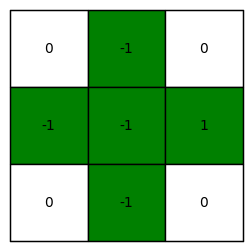

Round 3 lost!


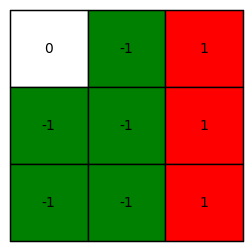

In [143]:
# Play the Magic Square game: Deterministic Pre-defined Product Error
play_magic_square_game(alice_rows_product, bob_columns_product)

Example 1 illustrates one of the many deterministic strategies that Alice and Bob can adopt. It is not difficult to convince yourself that, no matter how they decide to fill in their entries, it is impossible for them to come up with predefined answers that always win. Any deterministic strategy is a pair of matrices, one for Alice and another for Bob. The only way that they could design a strategy that wins with certainty every round is to prepare two identical matrices satisfying the requirements for each row and for each column. That is, a single matrix for which the product of every row is +1 and the product of every column is −1. Such a matrix cannot possibly exist! It turns out that the best that they can do is to win with probability 8/9.

### Random/Probabilistic Strategy

What if Alice and Bob decide for a probabilistic strategy? That is, Alice and Bob each carry a coin. When assigned a row/column, they flip their coins and fill the entries of the row/column based on the outcomes of the coins. Can they do better? To randomly assign values to one row (equivalently, one column) is essentially the same as randomly selecting one of the 29 possible predefined 3 × 3 grids (including those matrices that would lead to invalid answers). In other words, a probabilistic strategy for the Magic Square game is one in which Alice and Bob randomly
select a deterministic strategy. Hence, no matter how lucky Alice and Bob are, the probability of success of any strategy that they come up with is bounded by the winning probability of the best deterministic strategy, which is 8/9. Theorem ?? formalizes this argument.

In [4]:
possible_values = [+1, -1]
bob_matrix_random = [[0,0,0], [0,0,0], [0,0,0]]
alice_matrix_random = [[0,0,0], [0,0,0], [0,0,0]]
for i in range(3):
  for j in range(3):
    bob_matrix_random[i][j] = random.choice(possible_values)
    alice_matrix_random[i][j] = random.choice(possible_values)

0  0  0  
0  0  0  
0  0  0  
Round 1 won!


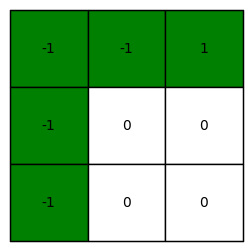

Round 3 lost!


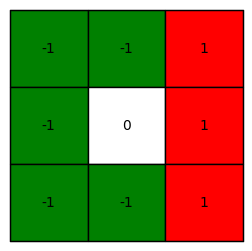

In [145]:
# Play the Magic Square game: Non-Deterministic Pre-defined Matrix
play_magic_square_game(alice_rows_product, bob_columns_product)